In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Section 1 - Load and Visualise the Data
- Download
- Load
- Visualise
- Normalisation

In [71]:
# load
X = pd.read_csv("./Linear_X_Train.csv")
y = pd.read_csv("./Linear_Y_Train.csv")

# Convert X,Y to Numpy arrays
X = X.values
y = y.values

# Normalisation
u = X.mean()
std = X.std()
X = (X - u) / std

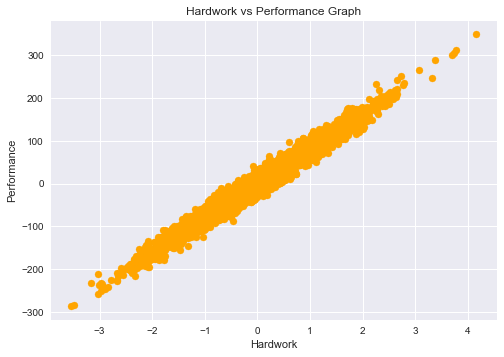

In [72]:
# Visualisation
plt.style.use('seaborn')
plt.scatter(X,y,color="orange")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.title("Hardwork vs Performance Graph")
plt.show()

### Section 2 - Linear Regression

In [73]:
def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_

In [74]:
def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x,theta)
        y  = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y) * x
    return grad/m


In [75]:
def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
    
    return (total_error/m)

In [76]:
def gradient_descent(X,Y,max_steps = 500,learning_rate = 0.1):
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    
    for i in range(max_steps):
        # Compute grad
        grad = gradient(X,y,theta)
        
        #Update theta
        theta[0] -= learning_rate*grad[0]
        theta[1] -= learning_rate*grad[1]
        
        # Storing error and theta after update
        e = error(X,y,theta)
        theta_list.append((theta[0],theta[1]))
        error_list.append(e)
        
    return theta, error_list, theta_list

In [77]:
theta, error_list, theta_list = gradient_descent(X,y)

In [78]:
theta

array([ 0.68386897, 79.90573694])

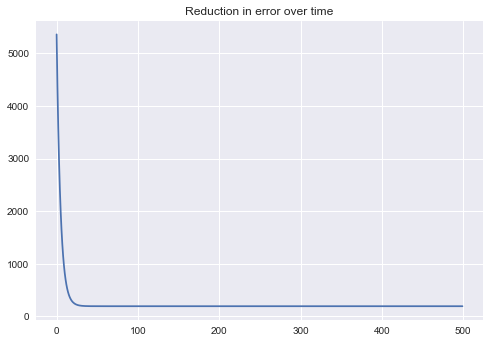

In [79]:
# Error Plot
plt.plot(error_list)
plt.title("Reduction in error over time")
plt.show()

### Section - 3 Predictions and Best Line

In [80]:
y_ = hypothesis(X,theta)
print(y_)

[[-19.57388181]
 [-43.69687794]
 [ 86.48717332]
 ...
 [-20.85100092]
 [138.7056574 ]
 [-35.87992564]]


### Plotting Training and Prediction values together

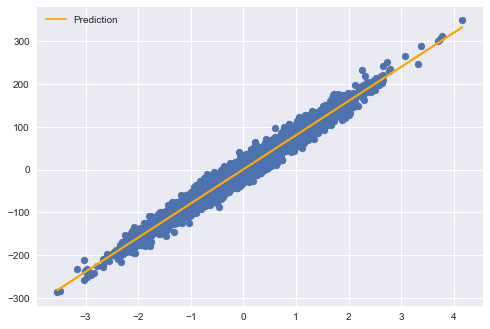

In [81]:
plt.scatter(X,y)
plt.plot(X,y_,color='orange',label = 'Prediction')
plt.legend()
plt.show()

### Predicting the Test Values

In [87]:
# Load the test data
X_test = pd.read_csv('./Linear_X_Test.csv').values
X_test = (X_test - X_test.mean()) / X_test.std()
y_test = hypothesis(X_test,theta)

In [88]:
df  = pd.DataFrame(data = y_test,columns=["y"])

In [89]:
df.to_csv('y_prediction.csv',index = False)

### Section - 4 Computing Score
#### Score : R2 (R-Squared) or Coefficient of Determination

In [90]:
def r2_score(Y,Y_):
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y-Y.mean())**2)
    score = (1 - num/denom)
    return score*100

In [91]:
r2_score(y,y_)

97.09612233822354

### Section - 5 Visualising Loss Function, Gradient Descent Trajectory, Theta Updates

In [42]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [43]:
theta

array([ 0.68386897, 79.90573694])

In [44]:
# Loss Actually
T0 = np.arange(-40,40,1)
T1 = np.arange(40,120,1)

T0,T1 = np.meshgrid(T0,T1)

J = np.zeros(T0.shape)

for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*X + T0[i,j]
        J[i,j] = np.sum((y-y_)**2)/y.shape[0]

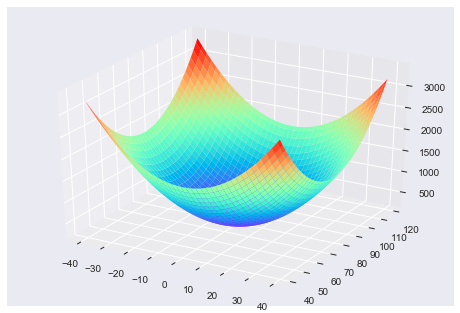

In [45]:
# Visualise the J (Loss)

fig = plt.figure()
axes = fig.gca(projection = '3d')
axes.plot_surface(T0,T1,J,cmap = 'rainbow')
plt.show()

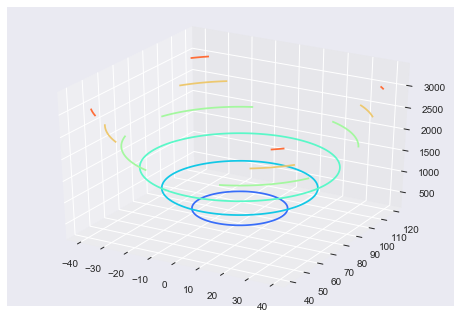

In [46]:
# Contour Plot

fig = plt.figure()
axes = fig.gca(projection = '3d')
axes.contour(T0,T1,J,cmap = 'rainbow')
plt.show()

### Plot the changes in values of theta

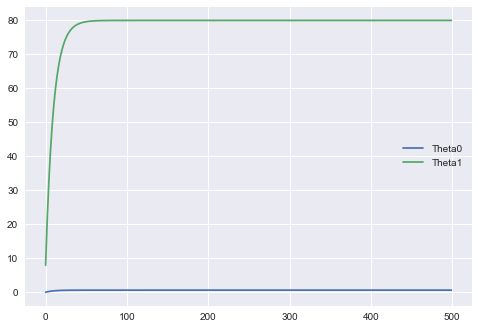

In [48]:
theta_list = np.array(theta_list)
plt.plot(theta_list[:,0],label="Theta0")
plt.plot(theta_list[:,1],label="Theta1")
plt.legend()
plt.show()

### Trajectory traced by theta Updates in Loss Function

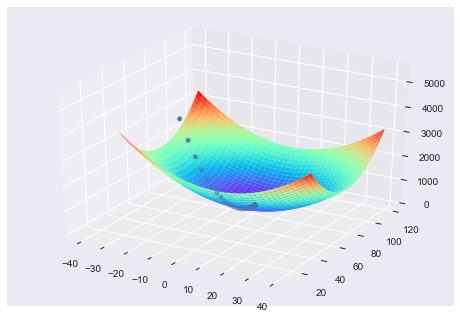

In [49]:
fig = plt.figure()
axes = fig.gca(projection = '3d')
axes.plot_surface(T0,T1,J,cmap = 'rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

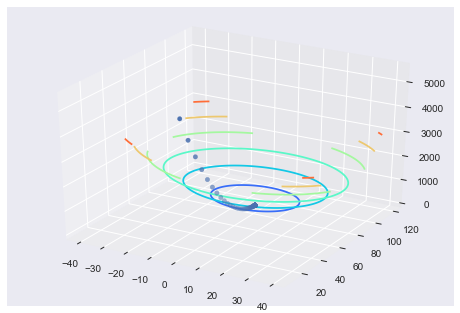

In [50]:
fig = plt.figure()
axes = fig.gca(projection = '3d')
axes.contour(T0,T1,J,cmap = 'rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

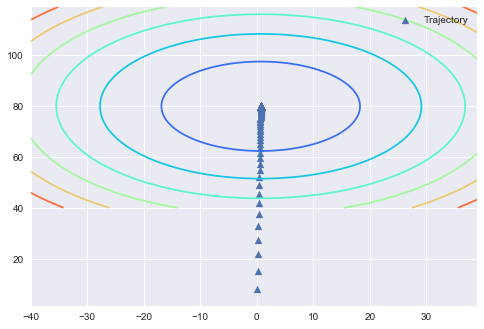

In [53]:
# 2D Contour Plot
plt.contour(T0,T1,J,cmap="rainbow")
plt.scatter(theta_list[:,0],theta_list[:,1],marker="^",label='Trajectory')
plt.legend()
plt.show()

In [54]:
# Save the data in file
np.save("ThetaList.npy",theta_list)

In [92]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [94]:
regr = LinearRegression() 
  
regr.fit(X, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
print(regr.score(X_test, y_test))

1.0


In [96]:
y_pred = regr.predict(X)

In [97]:
r2_score(y,y_pred)

97.09612233822354

In [98]:
# Load the test data
X_test = pd.read_csv('./Linear_X_Test.csv').values
X_test = (X_test - X_test.mean()) / X_test.std()
y_test = hypothesis(X_test,theta)

In [99]:
df  = pd.DataFrame(data = y_test,columns=["y"])

In [100]:
df.to_csv('y_prediction.csv',index = False)